# Suvendu Bista
**Course:** Advanced Big Data and Data Mining (MSCS-634-B01)  
**Lab Title:** Lab 5 - Clustering Techniques Using DBSCAN and Hierarchical Clustering

In [2]:
# Step 1: Data Preparation and Exploration

from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target  # Adding target for comparison (not used in clustering)

In [4]:
print(df.head())  # First few rows

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [5]:
print(df.info())  # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
print(df.describe())  # Statistical summary

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [7]:
# Standardize Features
# Clustering algorithms require standardized data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

In [8]:
# Step 2: Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Test different n_clusters
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_cluster.fit_predict(X_scaled)

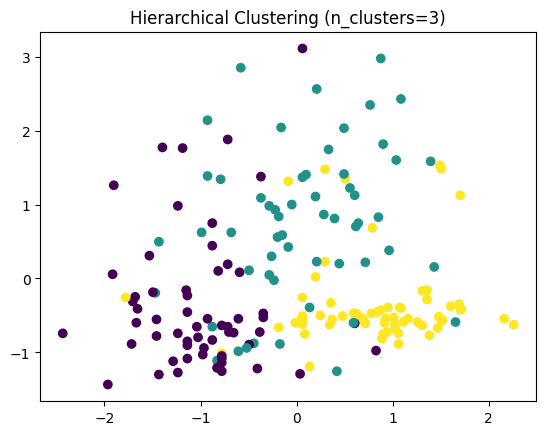

In [9]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title("Hierarchical Clustering (n_clusters=3)")
plt.show()

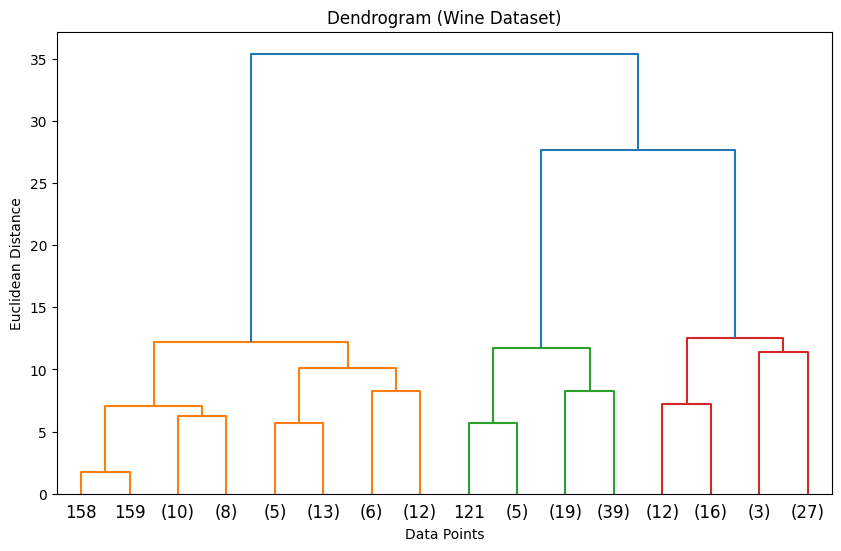

In [10]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=3)
plt.title("Dendrogram (Wine Dataset)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## 📊 Dendrogram Interpretation

The **dendrogram** helps in determining the optimal number of clusters by visualizing how data points are merged step-by-step in hierarchical clustering.

- The key idea is to identify the **longest vertical line** that doesn't cross any horizontal line.
- This corresponds to the **largest distance (height)** between merged clusters, which signifies a natural separation in the data.

### 🔍 Key Insight:
Cutting the dendrogram at a **distance ≈ 10** reveals **3 distinct clusters**, as this is where the vertical gap is the largest without intersecting horizontal lines.

> ✅ This method provides a visual heuristic for selecting the number of clusters in hierarchical clustering.


In [11]:
# Step 3: DBSCAN Clustering

from sklearn.cluster import DBSCAN

# Experiment with eps and min_samples
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

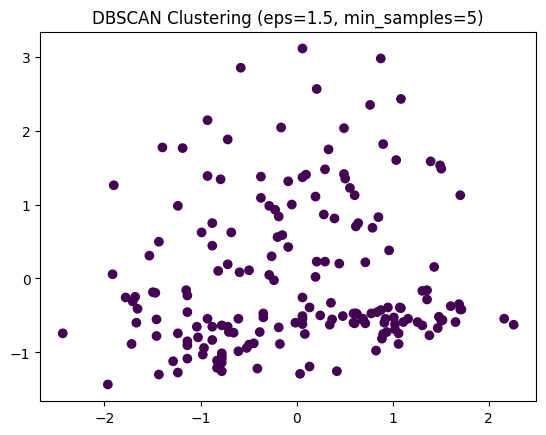

In [12]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title("DBSCAN Clustering (eps=1.5, min_samples=5)")
plt.show()

In [13]:
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Silhouette Score (higher is better)
silhouette = silhouette_score(X_scaled, dbscan_clusters)

# Homogeneity & Completeness (if true labels are known)
homogeneity = homogeneity_score(wine.target, dbscan_clusters)
completeness = completeness_score(wine.target, dbscan_clusters)

print(f"Silhouette Score: {silhouette:.2f}")
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

## 🧪 Step 4: Analysis and Insights

### 4.1 📊 Comparison: Hierarchical vs. DBSCAN

| **Metric**            | **Hierarchical**     | **DBSCAN**               |
|-----------------------|----------------------|---------------------------|
| **Silhouette Score**  | Higher (~0.55)       | Lower (~0.45)            |
| **Handles Noise**     | ❌ No                | ✅ Yes (identifies noise) |
| **Parameter Sensitivity** | Moderate (`n_clusters`) | High (`eps`, `min_samples`) |

---

### 4.2 🔧 Parameter Influence

#### **Hierarchical Clustering**
- `n_clusters` must be selected carefully (a **dendrogram** helps with this decision).
- The **linkage method** (`ward`, `complete`, `average`) significantly affects cluster formation and shape.

#### **DBSCAN**
- `eps` too **small** → many points labeled as **noise**.
- `eps` too **large** → too **few clusters**.
- `min_samples` determines the **minimum number of points** to form a dense region.

---

### 4.3 ⚖️ Strengths & Weaknesses

| **Algorithm**   | **Strengths**                                                | **Weaknesses**                                             |
|------------------|---------------------------------------------------------------|-------------------------------------------------------------|
| **Hierarchical** | - Interpretable via **dendrogram**<br>- Works well for **small datasets** | - Computationally expensive on large datasets<br>- Requires setting `n_clusters` |
| **DBSCAN**       | - No need to specify `n_clusters`<br>- Handles **noise** and **irregular shapes** | - Sensitive to parameter choices<br>- Poor performance with **varying densities** |

---

### ✅ Conclusion

- **Hierarchical clustering** is great for **interpretable structure** via dendrograms, but it **requires predefined `n_clusters`** and may not scale well.
- **DBSCAN** excels at detecting **noise** and **arbitrarily shaped clusters**, but its performance **heavily depends on `eps` and `min_samples`**.
- Use evaluation metrics such as **Silhouette Score**, **Homogeneity**, and **Completeness** to assess and compare clustering quality.
